In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/calibration_image_data.csv', sep=',',decimal='.')
df.head()

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,target_x_undist_warp,target_y_undist_warp,angle_dist,angle_undist,angle_dist_warp,angle_undist_warp,aruco_flipper_76_x,aruco_flipper_76_y,aruco_flipper_77_x,aruco_flipper_77_y
0,1,13,img_1,544.5,992.5,546.5,978.5,400.31912,562.67110,402.40564,...,1068.4825,534.40424,-45.318967,-45.191352,-45.724640,-45.597591,779.0,1217.5,863.0,1133.5
1,2,13,img_2,766.5,1279.0,771.0,1264.0,628.63520,853.44150,632.79670,...,1068.4825,534.40424,-80.865582,-81.086481,-81.381218,-81.591148,1029.0,1398.0,1050.0,1265.0
2,3,13,img_3,1098.0,1389.0,1101.5,1373.5,965.78076,963.85480,968.40430,...,1068.4825,534.40424,-112.082651,-112.289897,-112.468086,-112.674858,1321.0,1409.0,1265.0,1273.0
3,4,13,img_4,1514.0,1196.5,1514.0,1184.5,1384.80680,766.92880,1383.43700,...,1068.4825,534.40424,-151.987874,-152.006009,-152.130371,-152.173370,1049.0,855.5,741.5,691.5
4,5,13,img_5,1514.5,398.5,1511.5,394.0,1378.65440,-43.00896,1374.41130,...,1068.4825,534.40424,132.190351,132.411126,131.770874,131.992950,741.5,1266.0,848.0,1149.0


In [46]:
x = df[['target_x_undist', 'target_y_undist','angle_undist']]
y = df[['carriage_x_undist_warp','carriage_y_undist_warp']]

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, stratify=df['target_aruco'])

# Linear regressor

In [48]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

330.07633566079414 0.8573942123846983


Text(0.5, 1.0, 'actual vs predicted')

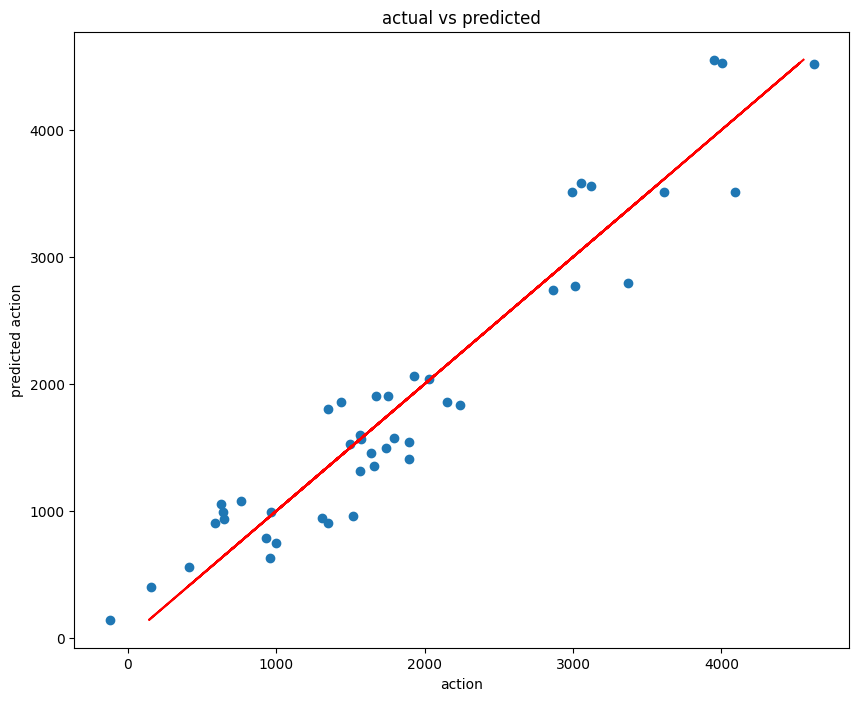

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('action')
plt.ylabel('predicted action')
plt.title('actual vs predicted')

# polynomic regressor

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

In [52]:
model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [53]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

89.7120898050627 0.990975321829735


Text(0.5, 1.0, 'actual vs predicted')

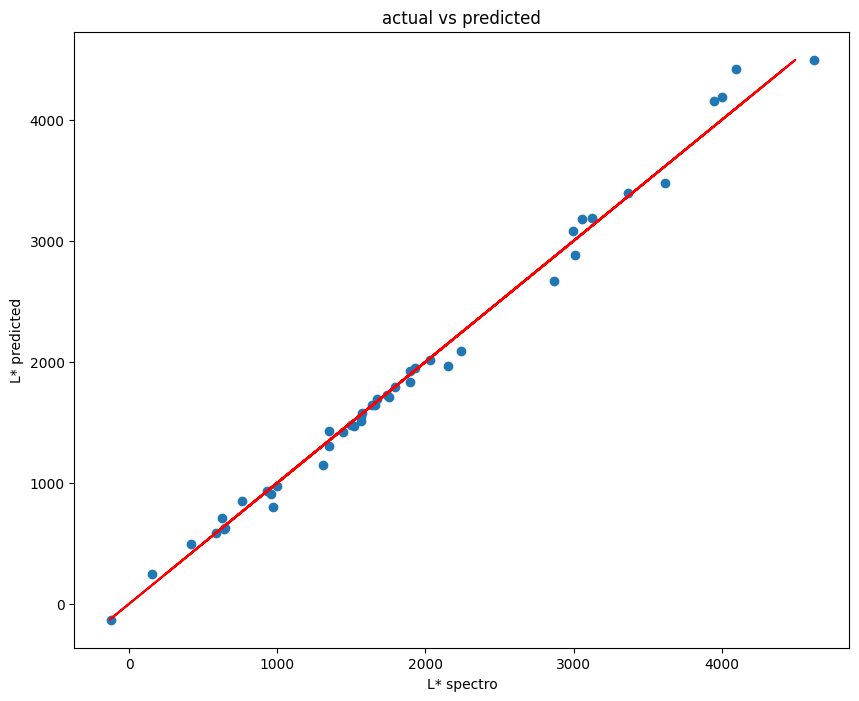

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# DecisionTreeRegressor

In [55]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [56]:
y_pred=model.predict(x_test)

In [57]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

383.5348428303265 0.7393431624493156


Text(0.5, 1.0, 'actual vs predicted')

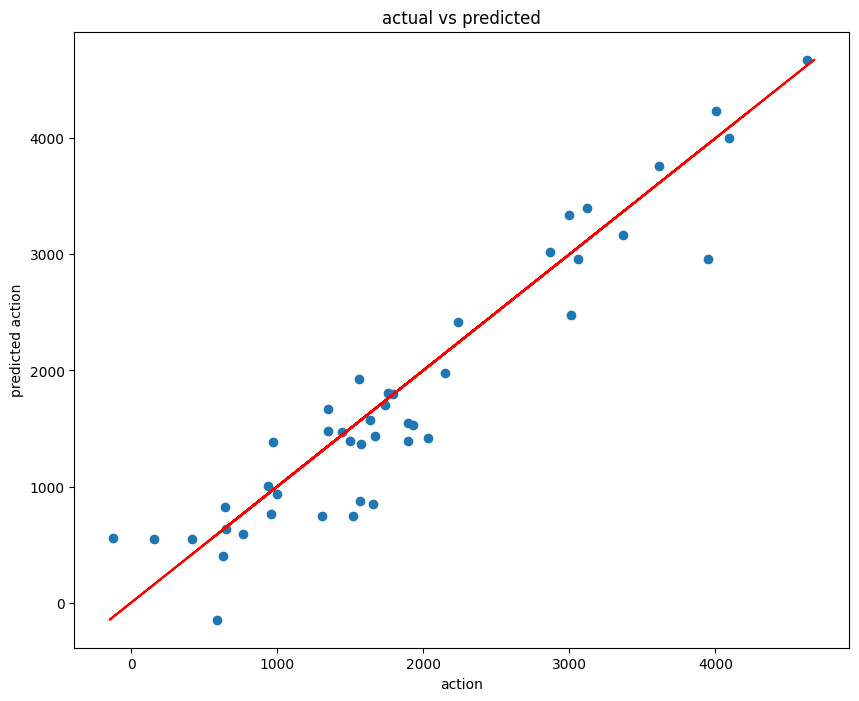

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('action')
plt.ylabel('predicted action')
plt.title('actual vs predicted')

# Gradient Boosting Regressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=400)
model.fit(x_train ,y_train)

ValueError: y should be a 1d array, got an array of shape (85, 2) instead.

In [109]:
y_pred=model.predict(x_test)

In [110]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

233224.90909090912 0.6935715456919319


Text(0.5, 1.0, 'actual vs predicted')

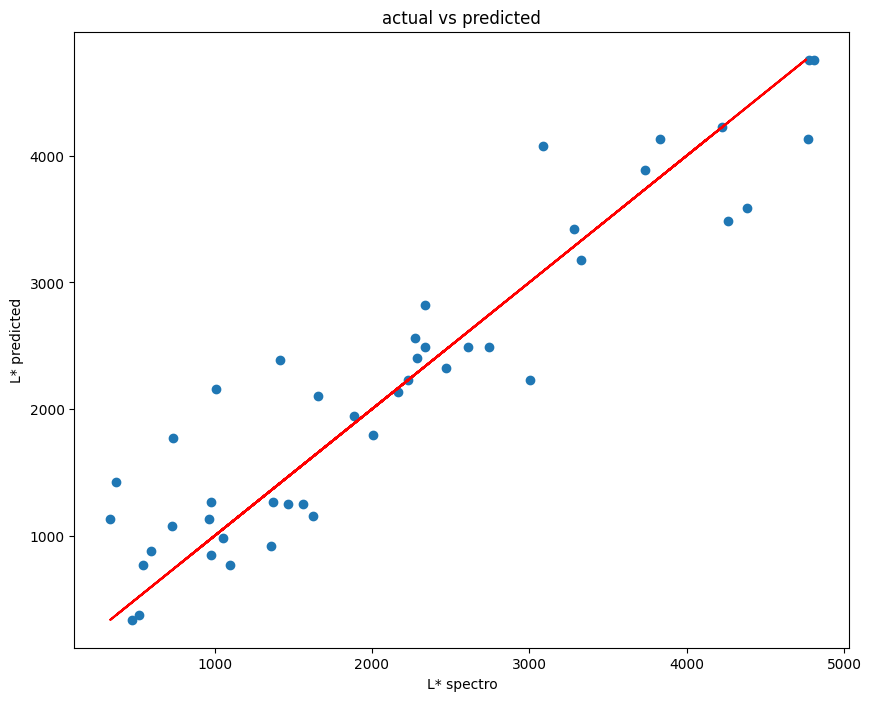

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# Random forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [25]:
y_pred=model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

241.39494046852263 0.9362678556812243


Text(0.5, 1.0, 'actual vs predicted')

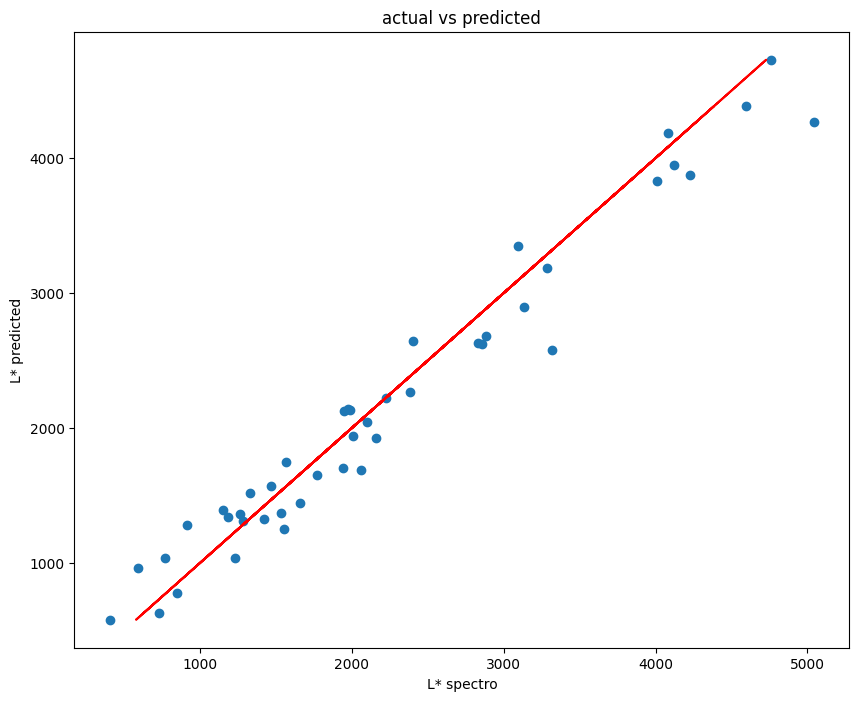

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# SVM

In [116]:
from sklearn import svm
model = svm.SVR()
model.fit(x_train, y_train.values.ravel())

ValueError: Found input variables with inconsistent numbers of samples: [85, 170]

In [358]:
y_pred=model.predict(x_test)

In [359]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

563379.1221670393 -0.252285112390084


Text(0.5, 1.0, 'actual vs predicted')

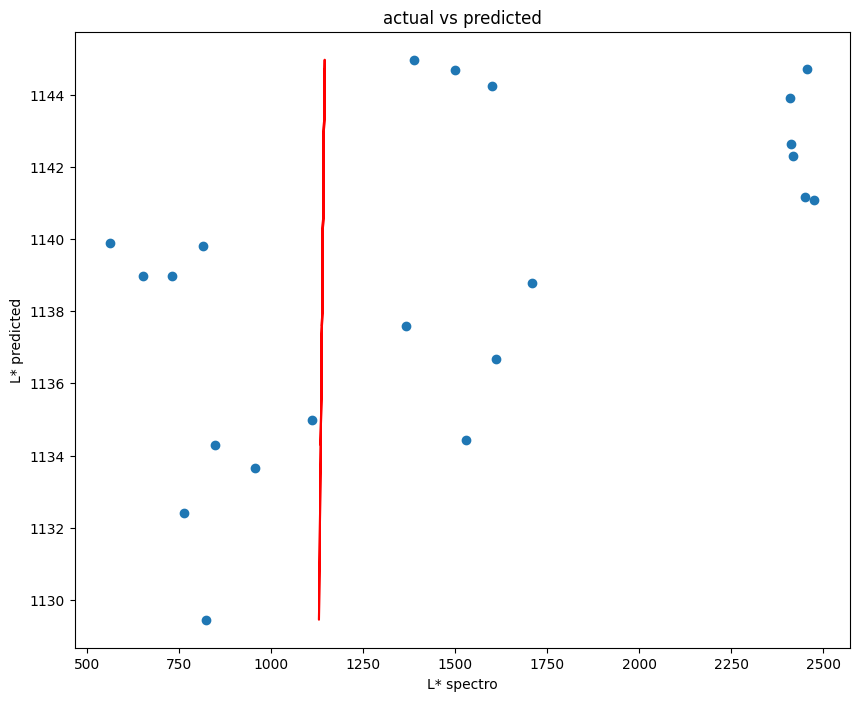

In [360]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# KRR

In [117]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(alpha=1.0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [118]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

102323.0113428386 0.8895194007945664


Text(0.5, 1.0, 'actual vs predicted')

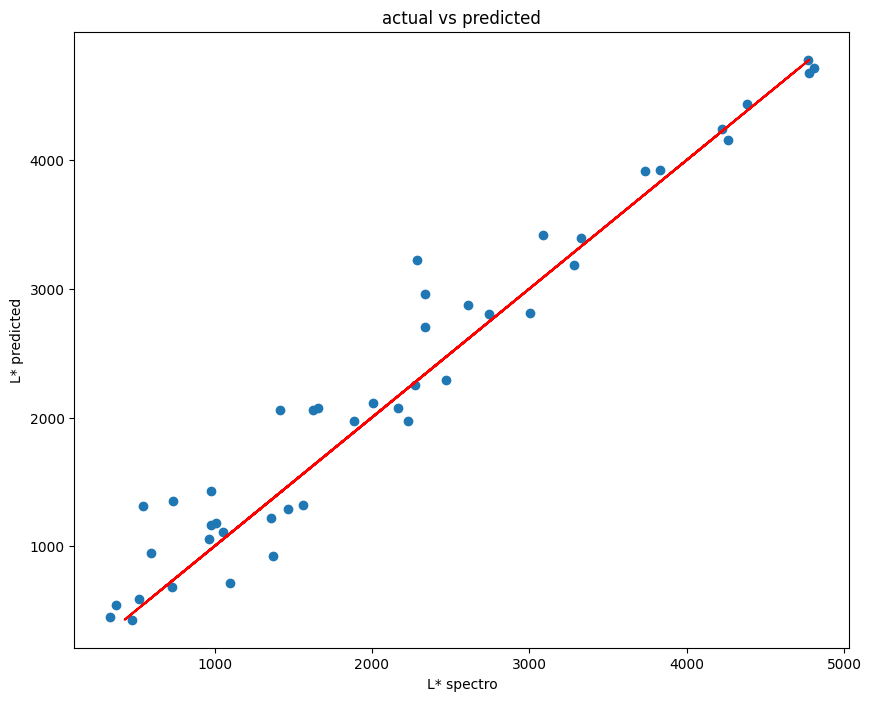

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')